# Logistic Regression Audio Classifier Model Training
## Model based on dhruvesh13's "Automatic music genre classification using Machine Learning algorithms like Logistic Regression and K-Nearest Neighbours." 
### https://github.com/dhruvesh13/Audio-Genre-Classification

In [ ]:
import sklearn
from sklearn import preprocessing
import librosa
#import librosa.display
import matplotlib.pyplot as plt
import os
from PIL import Image

In [188]:
import torch
import torchaudio
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision.io import read_image

import cv2
from skimage import color
from skimage import io

from torchaudio import transforms

In [4]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


In [453]:
AUDIO_FILE = './audioclips/real_clean/biden1.m4a1.wav'

samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)


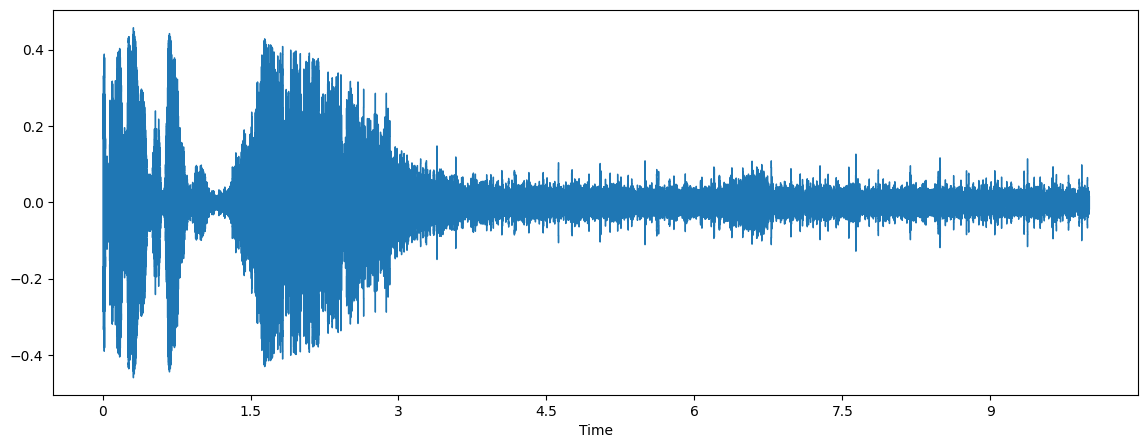

In [454]:


plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate)


In [455]:
# Load the audio file


MFCC is of type <class 'numpy.ndarray'> with shape (20, 862)


/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


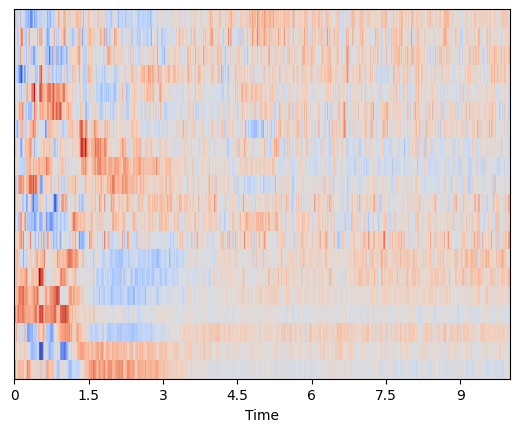

In [458]:
mfcc = librosa.feature.mfcc(y = samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')

In [11]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [22]:
def spectrogram_dataset(aud, real = True):
    data = []
    if real:
        AUDIO_FILE = './audioclips/real_clean/'
    else:
        AUDIO_FILE = './audioclips/aigen_clean/'
        
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    #librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

    print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')

In [ ]:
data = []

In [ ]:
class_map = {"aigen" : 0, "real": 1}

In [ ]:
for class_path in file_list:
    class_name = class_path.split("/")[-1]
    for img_path in glob.glob(class_path + "/*.jpeg"):
            self.data.append([img_path, class_name])

In [5]:
directory = 'audioclips/real_clean'
directory2= 'audioclips/aigen_clean'


In [6]:
data = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f) and filename.endswith("wav"):
        print(f)
        data.append([f, "real"])
        
for filename in os.listdir(directory2):
    f = os.path.join(directory2, filename)
    if os.path.isfile(f) and filename.endswith("wav"):
        print(f)
        data.append([f, "aigen"])
data

audioclips/real_clean/obama2.m4a215.wav
audioclips/real_clean/trump1.m4a548.wav
audioclips/real_clean/biden2.m4a291.wav
audioclips/real_clean/biden2.m4a285.wav
audioclips/real_clean/obama2.m4a201.wav
audioclips/real_clean/trump1.m4a574.wav
audioclips/real_clean/obama2.m4a229.wav
audioclips/real_clean/trump1.m4a212.wav
audioclips/real_clean/trump1.m4a206.wav
audioclips/real_clean/trump1.m4a560.wav
audioclips/real_clean/biden2.m4a252.wav
audioclips/real_clean/trump2.m4a61.wav
audioclips/real_clean/biden2.m4a246.wav
audioclips/real_clean/trump2.m4a75.wav
audioclips/real_clean/trump2.m4a49.wav
audioclips/real_clean/trump1.m4a96.wav
audioclips/real_clean/biden1.m4a248.wav
audioclips/real_clean/trump1.m4a82.wav
audioclips/real_clean/biden1.m4a274.wav
audioclips/real_clean/biden1.m4a260.wav
audioclips/real_clean/trump2.m4a234.wav
audioclips/real_clean/trump1.m4a55.wav
audioclips/real_clean/trump1.m4a41.wav
audioclips/real_clean/trump2.m4a220.wav
audioclips/real_clean/obama1.m4a233.wav
audiocl

[['audioclips/real_clean/obama2.m4a215.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a548.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a291.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a285.wav', 'real'],
 ['audioclips/real_clean/obama2.m4a201.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a574.wav', 'real'],
 ['audioclips/real_clean/obama2.m4a229.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a212.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a206.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a560.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a252.wav', 'real'],
 ['audioclips/real_clean/trump2.m4a61.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a246.wav', 'real'],
 ['audioclips/real_clean/trump2.m4a75.wav', 'real'],
 ['audioclips/real_clean/trump2.m4a49.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a96.wav', 'real'],
 ['audioclips/real_clean/biden1.m4a248.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a82.wav', 'real'],
 ['audioclips/real_clean/biden1.m

/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scalin

KeyboardInterrupt: 

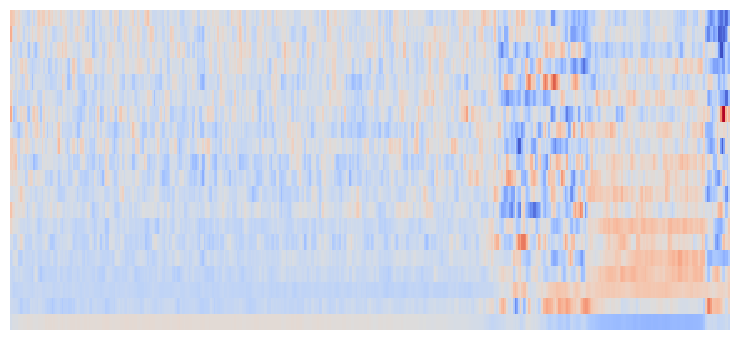

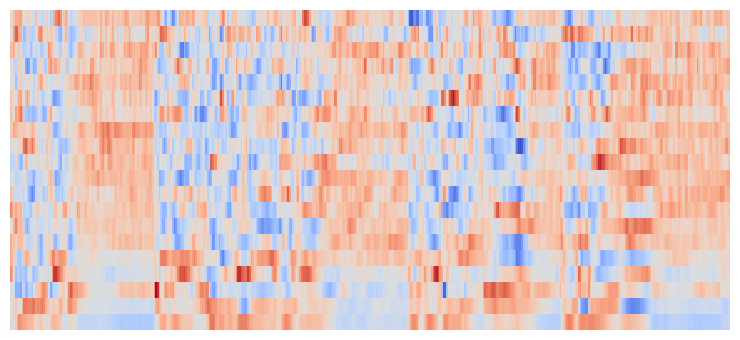

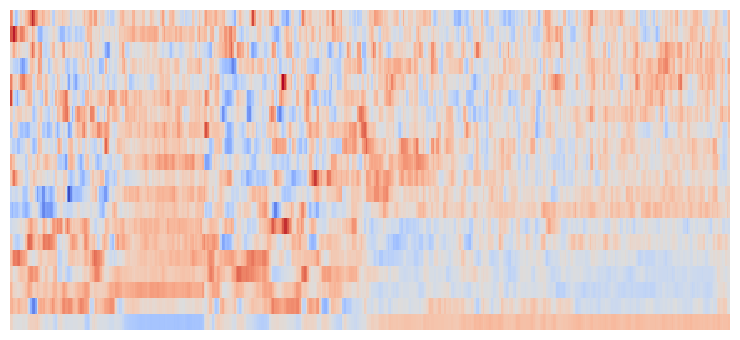

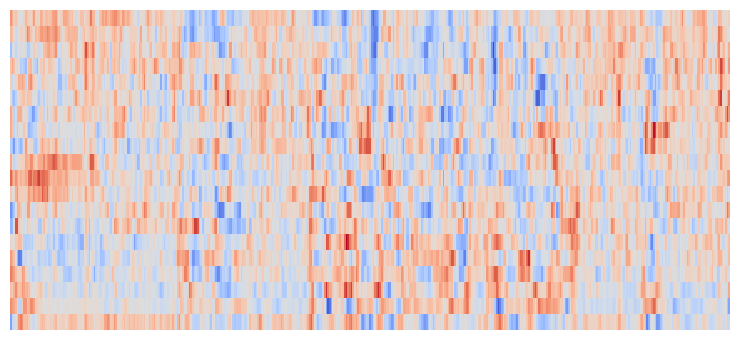

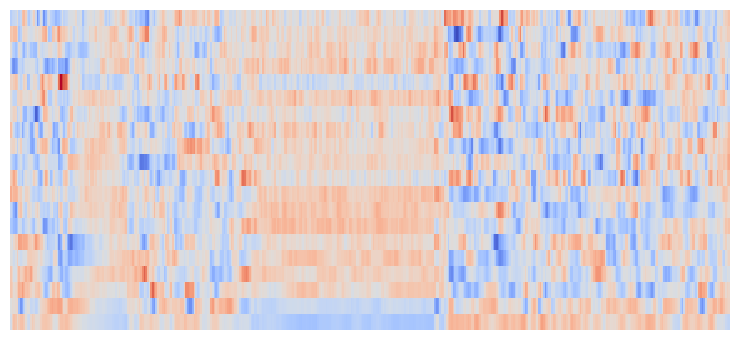

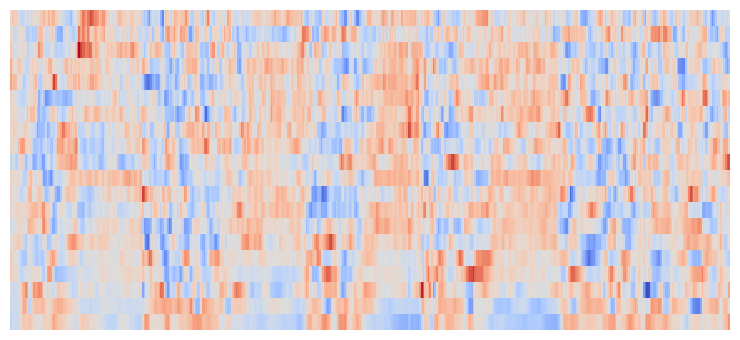

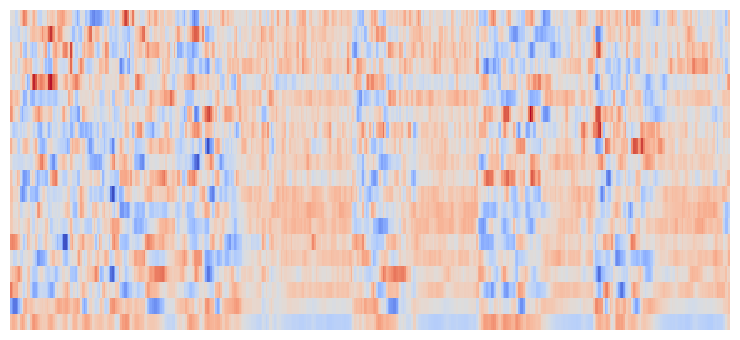

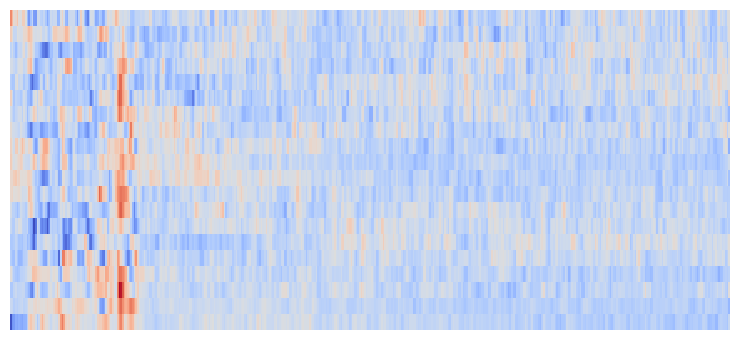

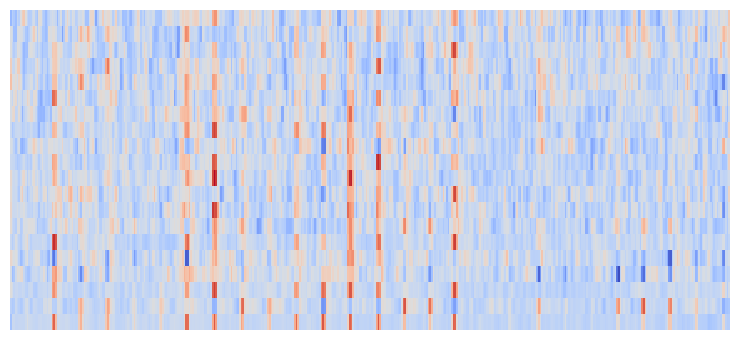

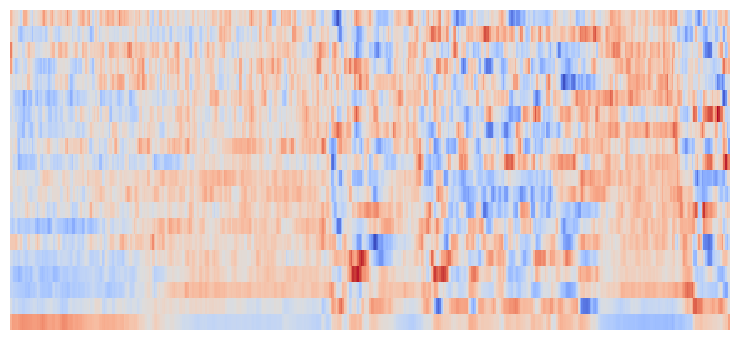

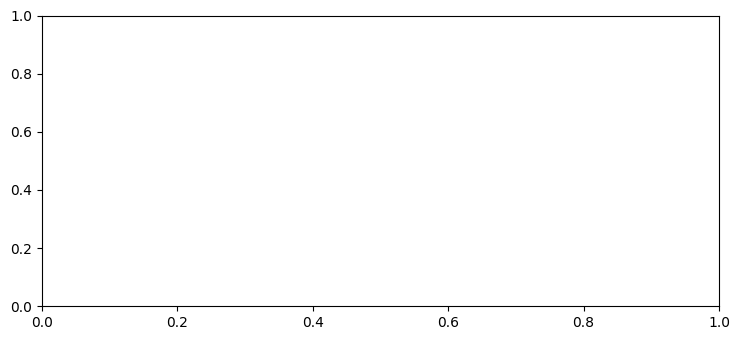

In [6]:

for [path, label] in data:
    if label == "real":


        plt.rcParams["figure.figsize"] = [7.50, 3.50]
        plt.rcParams["figure.autolayout"] = True
        fig, ax = plt.subplots()

        samples, sample_rate = librosa.load(path)

        mfcc = librosa.feature.mfcc(y = samples, sr=sample_rate)
        mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
        img = librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
        plt.axis('off')
        plt.savefig("real_images/"+path.split("/")[2].split(".wav")[0] + ".png", bbox_inches='tight', pad_inches = 0)
    else:
        plt.rcParams["figure.figsize"] = [7.50, 3.50]
        plt.rcParams["figure.autolayout"] = True
        fig, ax = plt.subplots()

        samples, sample_rate = librosa.load(path)

        mfcc = librosa.feature.mfcc(y = samples, sr=sample_rate)
        mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
        img = librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
        plt.axis('off')
        plt.savefig("aigen_images/"+path.split("/")[2].split(".wav")[0] + ".png", bbox_inches='tight', pad_inches = 0)
        

In [7]:
data

[['audioclips/real_clean/obama2.m4a215.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a548.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a291.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a285.wav', 'real'],
 ['audioclips/real_clean/obama2.m4a201.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a574.wav', 'real'],
 ['audioclips/real_clean/obama2.m4a229.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a212.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a206.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a560.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a252.wav', 'real'],
 ['audioclips/real_clean/trump2.m4a61.wav', 'real'],
 ['audioclips/real_clean/biden2.m4a246.wav', 'real'],
 ['audioclips/real_clean/trump2.m4a75.wav', 'real'],
 ['audioclips/real_clean/trump2.m4a49.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a96.wav', 'real'],
 ['audioclips/real_clean/biden1.m4a248.wav', 'real'],
 ['audioclips/real_clean/trump1.m4a82.wav', 'real'],
 ['audioclips/real_clean/biden1.m

In [8]:
import pandas as pd
import numpy as np
from PIL import Image


In [9]:
data_images = []
        
for [path, label] in data:
    if label == "real":
        data_images.append(["real_images/" + path.split("/")[2].split(".wav")[0] + ".png", label ])
    else:
        data_images.append(["aigen_images/" + path.split("/")[2].split(".wav")[0] + ".png", label ])
data_images

[['real_images/obama2.m4a215.png', 'real'],
 ['real_images/trump1.m4a548.png', 'real'],
 ['real_images/biden2.m4a291.png', 'real'],
 ['real_images/biden2.m4a285.png', 'real'],
 ['real_images/obama2.m4a201.png', 'real'],
 ['real_images/trump1.m4a574.png', 'real'],
 ['real_images/obama2.m4a229.png', 'real'],
 ['real_images/trump1.m4a212.png', 'real'],
 ['real_images/trump1.m4a206.png', 'real'],
 ['real_images/trump1.m4a560.png', 'real'],
 ['real_images/biden2.m4a252.png', 'real'],
 ['real_images/trump2.m4a61.png', 'real'],
 ['real_images/biden2.m4a246.png', 'real'],
 ['real_images/trump2.m4a75.png', 'real'],
 ['real_images/trump2.m4a49.png', 'real'],
 ['real_images/trump1.m4a96.png', 'real'],
 ['real_images/biden1.m4a248.png', 'real'],
 ['real_images/trump1.m4a82.png', 'real'],
 ['real_images/biden1.m4a274.png', 'real'],
 ['real_images/biden1.m4a260.png', 'real'],
 ['real_images/trump2.m4a234.png', 'real'],
 ['real_images/trump1.m4a55.png', 'real'],
 ['real_images/trump1.m4a41.png', 'rea

In [194]:
import random
random.shuffle(data_images)

data= data_images[0:1000]
train_data = data_images[0:1000]
test_data = data_images[1000:1300]

print(len(train_data), len(test_data))


1000 300


In [195]:
training_data, training_label = dataprocess(train_data)

testing_data, testing_label = dataprocess(test_data)

In [197]:
print(testing_data)

[[[0.8555498  0.8555498  0.86165882 ... 0.59712863 0.73317098 0.73317098]
  [0.8555498  0.8555498  0.86165882 ... 0.59712863 0.73317098 0.73317098]
  [0.8555498  0.8555498  0.86165882 ... 0.59712863 0.73317098 0.73317098]
  ...
  [0.6010502  0.6010502  0.66460667 ... 0.75638784 0.73317098 0.73317098]
  [0.6010502  0.6010502  0.66460667 ... 0.75638784 0.73317098 0.73317098]
  [0.6010502  0.6010502  0.66460667 ... 0.75638784 0.73317098 0.73317098]]

 [[0.59385922 0.59385922 0.74116314 ... 0.85761725 0.73189843 0.73189843]
  [0.59385922 0.59385922 0.74116314 ... 0.85761725 0.73189843 0.73189843]
  [0.59385922 0.59385922 0.74116314 ... 0.85761725 0.73189843 0.73189843]
  ...
  [0.85591294 0.85591294 0.85816784 ... 0.84580196 0.82458706 0.82458706]
  [0.85591294 0.85591294 0.85816784 ... 0.84580196 0.82458706 0.82458706]
  [0.85591294 0.85591294 0.85816784 ... 0.84580196 0.82458706 0.82458706]]

 [[0.67716627 0.67716627 0.83616235 ... 0.8601549  0.85164314 0.85164314]
  [0.67716627 0.677166

In [198]:
training_label

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [199]:
test_set_x  = testing_data.reshape(testing_data.shape[0], -1) #/255

len(test_set_x[0])

230400

In [200]:
train_set_x  = training_data.reshape(training_data.shape[0], -1)# /255



In [201]:
train_set_x.shape

(1000, 230400)

In [202]:
train_set_x = train_set_x.T
test_set_x = test_set_x.T

In [203]:
train_y = np.matrix(training_label)
train_y = np.array(train_y)
train_y.shape

(1, 1000)

In [204]:
test_y = np.matrix(testing_label)
test_y = np.array(test_y)
test_y.shape

(1, 300)

In [205]:
from sklearn import linear_model


In [206]:
train_set_x

array([[0.63396863, 0.84189529, 0.85337529, ..., 0.86000706, 0.86055765,
        0.81565765],
       [0.63396863, 0.84189529, 0.85337529, ..., 0.86000706, 0.86055765,
        0.81565765],
       [0.68951922, 0.83853922, 0.85337529, ..., 0.86214196, 0.86214196,
        0.78826627],
       ...,
       [0.84178824, 0.84940118, 0.77513255, ..., 0.86165882, 0.83053647,
        0.84970863],
       [0.72852745, 0.85591294, 0.77149373, ..., 0.86220941, 0.68643098,
        0.86055765],
       [0.72852745, 0.85591294, 0.77149373, ..., 0.86220941, 0.68643098,
        0.86055765]])

In [207]:
train_y[0].shape

(1000,)

In [208]:
logr = linear_model.LogisticRegression()
logr.fit(train_set_x.T,train_y[0])




/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [211]:
predicted = logr.predict(test_set_x.T)
print(predicted)

[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0]


In [212]:
test_y


array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 

In [213]:
count = 0
for i in range(len(predicted)):
    if predicted[i] == test_y[0][i]:
        count +=1
    
print(count/len(predicted))

0.5133333333333333


In [472]:
import scipy.io.wavfile
import numpy as np 
import sys
import os
import glob
from python_speech_features import mfcc

In [473]:
data

[['real_images/trump2.m4a12.png', 'real'],
 ['real_images/obama1.m4a28.png', 'real'],
 ['real_images/obama1.m4a181.png', 'real'],
 ['aigen_images/minecraft.m4a405.png', 'aigen'],
 ['real_images/trump2.m4a262.png', 'real'],
 ['real_images/obama1.m4a311.png', 'real'],
 ['aigen_images/freddy.m4a206.png', 'aigen'],
 ['aigen_images/sleepover.m4a163.png', 'aigen'],
 ['aigen_images/minecraft.m4a148.png', 'aigen'],
 ['real_images/obama2.m4a280.png', 'real'],
 ['aigen_images/freddy.m4a239.png', 'aigen'],
 ['aigen_images/minecraft.m4a409.png', 'aigen'],
 ['aigen_images/freddy2.m4a292.png', 'aigen'],
 ['real_images/trump1.m4a267.png', 'real'],
 ['aigen_images/minecraft.m4a939.png', 'aigen'],
 ['real_images/trump1.m4a333.png', 'real'],
 ['real_images/trump1.m4a54.png', 'real'],
 ['real_images/obama1.m4a194.png', 'real'],
 ['aigen_images/freddy.m4a63.png', 'aigen'],
 ['real_images/obama2.m4a39.png', 'real'],
 ['aigen_images/minecraft.m4a945.png', 'aigen'],
 ['aigen_images/freddy2.m4a141.png', 'aige

In [474]:
def create_ceps(wavfile, real):
    sr, speech = scipy.io.wavfile.read(wavfile)
    print(sr)
    ceps=mfcc(speech)
    #ceps, mspec, spec= mfcc(song_array)
    print(ceps.shape)

    bad = np.where(np.isnan(ceps))
    bad2=np.where(np.isinf(ceps))
    ceps[bad]=0
    ceps[bad2]=0
    write_ceps(ceps, wavfile, real)
def write_ceps(ceps, wavfile, real):
    base_wav, ext = os.path.splitext(wavfile)
    if real:
        data_wav = "real_ceps/" + base_wav.split("/")[2] + ".ceps"
    else:
        data_wav = "aigen_ceps/" + base_wav.split("/")[2] + ".ceps"
    np.save(data_wav, ceps)
    
def creatething():
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and filename.endswith("wav"):
            print(f)
            create_ceps(f, True)
    for filename in os.listdir(directory2):
        f = os.path.join(directory2, filename)
        if os.path.isfile(f) and filename.endswith("wav"):
            print(f)
            create_ceps(f, False)


            


In [475]:
creatething()

audioclips/real_clean/obama2.m4a215.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a548.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a291.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a285.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a201.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a574.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a229.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a212.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a206.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a560.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a252.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a61.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a246.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a75.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a49.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a96.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a248.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a82.

(5511, 13)
audioclips/real_clean/biden1.m4a329.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a396.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a176.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a159.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a382.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a162.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a74.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a226.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a232.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a209.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a68.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a221.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a40.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a54.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a235.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a261.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a275.wav
44100
(5511, 13)
audioclips/real_clean/tr

(5511, 13)
audioclips/real_clean/trump1.m4a416.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a114.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a190.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a45.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a370.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a358.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a43.wav
44100
(2755, 13)
audioclips/real_clean/obama2.m4a363.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a183.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a128.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a197.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a79.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a57.wav
44100
(2755, 13)
audioclips/real_clean/obama2.m4a88.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a345.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a418.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a351.wav
44100
(2755, 13)
audioclips/real_clean/tru

(5511, 13)
audioclips/real_clean/biden1.m4a138.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a187.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a47.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a69.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a157.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a82.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a308.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a178.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a96.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a143.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a334.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a90.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a150.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a144.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a320.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a84.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a145.wav
44100
(5511, 13)
audioclips/real_clean/obam

(5511, 13)
audioclips/real_clean/biden1.m4a311.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a70.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a166.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a339.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a386.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a149.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a172.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a392.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a64.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a379.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a199.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a342.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a109.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a356.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a345.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a121.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a423.wav
44100
(5511, 13)
audioclips/real_clean/

(5511, 13)
audioclips/real_clean/trump1.m4a517.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a503.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a265.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a231.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a225.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a16.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a289.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a219.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a294.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a280.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a217.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a293.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a287.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a203.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a6.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a36.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a257.wav
44100
(5511, 13)
audioclips/real_clean/ob

(5511, 13)
audioclips/real_clean/trump2.m4a17.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a224.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a230.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a502.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a264.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a270.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a516.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a263.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a258.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a277.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a261.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a528.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a275.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a266.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a500.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a249.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a514.wav
44100
(5511, 13)
audioclips/real_clean

(5511, 13)
audioclips/real_clean/trump2.m4a241.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a291.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a215.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a4.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a201.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a285.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a229.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a296.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a282.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a28.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a233.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a14.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a227.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a298.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a515.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a248.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a273.wav
44100
(5511, 13)
audioclips/real_clean/tr

(5511, 13)
audioclips/real_clean/trump1.m4a100.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a402.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a416.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a114.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a39.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a17.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a370.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a250.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a31.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a25.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a244.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a257.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a243.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a6.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a278.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a19.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a293.wav
44100
(5511, 13)
audioclips/real_clean/biden

(5511, 13)
audioclips/real_clean/biden1.m4a398.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a327.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a334.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a469.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a320.wav
44100
(2755, 13)
audioclips/real_clean/obama2.m4a110.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a28.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a194.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a429.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a482.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a180.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a12.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a104.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a14.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a373.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a415.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a117.wav
44100
(5511, 13)
audioclips/real_clean/t

(5511, 13)
audioclips/real_clean/obama2.m4a336.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a169.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a38.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a16.wav
44100
(2755, 13)
audioclips/real_clean/trump1.m4a319.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a322.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a310.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a394.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a380.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a304.wav
44100
(2755, 13)
audioclips/real_clean/trump2.m4a459.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a173.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a471.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a317.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a303.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a465.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a338.wav
44100
(2755, 13)
audioclips/real_clean/

(5511, 13)
audioclips/real_clean/obama1.m4a139.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a372.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a116.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a142.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a440.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a13.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a326.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a332.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a29.wav
44100
(2755, 13)
audioclips/real_clean/trump1.m4a454.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a309.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a156.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a321.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a15.wav
44100
(2755, 13)
audioclips/real_clean/obama2.m4a335.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a468.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a307.wav
44100
(2755, 13)
audioclips/real_clean/b

(5511, 13)
audioclips/real_clean/trump1.m4a487.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a112.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a129.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a376.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a362.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a106.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a363.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a107.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a113.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a377.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a128.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a100.wav
44100
(2755, 13)
audioclips/real_clean/trump1.m4a486.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a184.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a190.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a492.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a114.wav
44100
(2755, 13)
audioclips/real_clea

(5511, 13)
audioclips/real_clean/biden1.m4a151.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a453.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a179.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a326.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a28.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a309.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a12.wav
44100
(2755, 13)
audioclips/real_clean/obama2.m4a332.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a186.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a139.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a484.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a102.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a116.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a349.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a490.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a192.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a105.wav
44100
(5511, 13)
audioclips/real_clean/

(5511, 13)
audioclips/real_clean/obama2.m4a97.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a361.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a181.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a375.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a195.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a83.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a111.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a413.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a139.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a186.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a366.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a85.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a91.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a349.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a192.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a372.wav
44100
(2755, 13)
audioclips/real_clean/obama2.m4a340.wav
44100
(5511, 13)
audioclips/real_clean/ob

(5511, 13)
audioclips/real_clean/trump2.m4a43.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a581.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a258.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a595.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a7.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a242.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a88.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a256.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a239.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a0.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a202.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a63.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a77.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a216.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a205.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a281.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a295.wav
44100
(5511, 13)
audioclips/real_clean/obama1

(5511, 13)
audioclips/real_clean/obama1.m4a210.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a204.wav
44100
(2755, 13)
audioclips/real_clean/biden1.m4a280.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a217.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a76.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a1.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a238.wav
44100
(2755, 13)
audioclips/real_clean/trump1.m4a62.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a203.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a257.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a89.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a243.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a6.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a594.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a580.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a259.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a42.wav
44100
(5511, 13)
audioclips/real_clean/biden2

(5511, 13)
audioclips/real_clean/biden2.m4a61.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a354.wav
44100
(5511, 13)
audioclips/real_clean/biden1.m4a130.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a432.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a102.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a400.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a186.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a366.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a90.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a84.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a192.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a372.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a414.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a349.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a116.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a361.wav
44100
(2755, 13)
audioclips/real_clean/trump1.m4a181.wav
44100
(5511, 13)
audioclips/real_clean/b

(5511, 13)
audioclips/real_clean/obama2.m4a345.wav
44100
(5511, 13)
audioclips/real_clean/obama2.m4a351.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a71.wav
44100
(2755, 13)
audioclips/real_clean/obama1.m4a161.wav
44100
(2755, 13)
audioclips/real_clean/trump1.m4a381.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a175.wav
44100
(2755, 13)
audioclips/real_clean/trump1.m4a395.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a88.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a302.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a166.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a172.wav
44100
(5511, 13)
audioclips/real_clean/obama1.m4a149.wav
44100
(2755, 13)
audioclips/real_clean/biden2.m4a316.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a7.wav
44100
(5511, 13)
audioclips/real_clean/trump2.m4a173.wav
44100
(5511, 13)
audioclips/real_clean/biden2.m4a317.wav
44100
(5511, 13)
audioclips/real_clean/trump1.m4a6.wav
44100
(5511, 13)
audioclips/real_clean/obam

(5511, 13)
audioclips/aigen_clean/freddy.m4a325.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a331.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a356.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a937.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a319.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a738.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a134.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a2.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a120.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a704.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a108.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a710.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a127.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a46.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a140.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a52.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a154

(5511, 13)
audioclips/aigen_clean/minecraft.m4a908.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a123.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a1.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a137.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a713.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a707.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a288.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a51.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a157.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a130.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a124.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a45.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a143.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a79.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a118.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a27.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a13.wa

(5511, 13)
audioclips/aigen_clean/freddy2.m4a152.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a135.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a299.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a121.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a40.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a146.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a514.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a272.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a266.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a500.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a191.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a16.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a97.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a528.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a22.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a36.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a185.wa

(5511, 13)
audioclips/aigen_clean/minecraft.m4a271.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a29.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a517.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a186.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a80.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a35.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a259.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a21.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a192.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a15.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a94.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a20.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a95.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a14.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a193.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a81.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a187.wav
4410

(5511, 13)
audioclips/aigen_clean/minecraft.m4a203.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a217.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a571.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a216.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a570.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a564.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a202.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a46.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a192.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a72.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a558.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a66.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a186.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a52.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a99.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a18.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a

(5511, 13)
audioclips/aigen_clean/freddy.m4a185.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a191.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a71.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a229.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a45.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a109.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a92.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a146.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a121.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a27.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a598.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a135.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a33.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a152.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a86.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a169.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a765.wav
44100


(5511, 13)
audioclips/aigen_clean/freddy2.m4a130.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a36.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a589.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a157.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a118.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a984.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a150.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a990.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a748.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a144.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a760.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a774.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a178.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a193.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a947.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a326.wav
44100
(5511, 13)
audioclips/aigen_clean/sl

(5511, 13)
audioclips/aigen_clean/sleepover.m4a153.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a777.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a763.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a788.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a184.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a331.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a950.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a190.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a325.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a944.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a978.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a319.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a159.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a286.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a292.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a165.wav
44100
(5511, 13)
audioclips/aigen_clean/

(5511, 13)
audioclips/aigen_clean/minecraft.m4a960.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a627.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a141.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a155.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a633.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a169.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a182.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a196.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a828.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a249.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a261.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a800.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a206.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a212.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a275.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a814.wav
44100
(5511, 13)
audioclips/aigen_clean/mi

(5511, 13)
audioclips/aigen_clean/minecraft.m4a803.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a262.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a205.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a354.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a432.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a426.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a340.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a368.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a202.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a216.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a397.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a15.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a9.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a383.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a29.wav
44100
(5511, 13)
audioclips/aigen_clean/playing.m4a49.wav
44100
(5511, 13)
audioclips/aigen_clean/mi

44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a392.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a386.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a390.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a12.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a384.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a353.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a435.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a421.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a347.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a205.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a409.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a211.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a192.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a186.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a259.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a838.wav
44100
(5511, 13)
audioclips

(5511, 13)
audioclips/aigen_clean/minecraft.m4a1011.wav
44100
(5511, 13)
audioclips/aigen_clean/playing.m4a8.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a1005.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a203.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a862.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a264.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a692.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a1039.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a258.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a686.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a679.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a889.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a651.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a137.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a123.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a645.wav
44100
(5511, 13)
audioclips/aigen_clean

(5511, 13)
audioclips/aigen_clean/minecraft.m4a120.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a134.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a652.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a915.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a313.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a307.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a901.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a360.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a348.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a929.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a102.wav
44100
(5511, 13)
audioclips/aigen_clean/sleepover.m4a116.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a732.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a8.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a726.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a111.wav
44100
(5511, 13)
audioclips/aigen_clean/fredd

(5511, 13)
audioclips/aigen_clean/minecraft.m4a290.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a284.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a114.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a75.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a173.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a61.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a167.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a100.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a535.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a253.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a247.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a198.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a521.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a37.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a509.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a17.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a

(5511, 13)
audioclips/aigen_clean/minecraft.m4a34.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a35.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a21.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a15.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a279.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a251.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a537.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a88.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a523.wav
44100
(5511, 13)
audioclips/aigen_clean/minecraft.m4a245.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a29.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a171.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a77.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a116.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy.m4a102.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a165.wav
44100
(5511, 13)
audioclips/aigen_clean/freddy2.m4a63.wav

In [476]:
import sklearn 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scipy
import os
import sys
import glob
import numpy as np
import joblib
from random import shuffle

In [477]:
def read_ceps():
    X= []
    y=[]
    for x in [0,1]:
        print(x)
        if x:
            directory = "real_ceps/"
        else:
            #print("here")
            directory = "aigen_ceps/"

        for filename in os.listdir(directory):
            print(filename)
            if filename.endswith("npy"):
                ceps = np.load(directory + filename)
                num_ceps = len(ceps)
                X.append(np.mean(ceps[int(num_ceps*1/10):int(num_ceps*9/10)], axis=0))
                    #X.append(ceps)
                #print(y)
                y.append(x)

    print(np.array(X).shape)
    print(len(y))
    return np.array(X), np.array(y)

In [478]:
def learn_and_classify(X_train, y_train, X_test, y_test):


    print(len(X_train))
    print(len(X_train[0]))

    #Logistic Regression classifier

    logistic_classifier = LogisticRegression()
    logistic_classifier.fit(X_train, y_train)
    logistic_predictions = logistic_classifier.predict(X_test)
    logistic_accuracy = accuracy_score(y_test, logistic_predictions)
    logistic_cm = confusion_matrix(y_test, logistic_predictions)
    print("logistic accuracy = " + str(logistic_accuracy))
    print("logistic_cm:")
    print(logistic_cm)

    #change the pickle file when using another classifier eg model_mfcc_fft

    #joblib.dump(logistic_classifier, 'saved_models/model_mfcc_log.pkl')

    disp = ConfusionMatrixDisplay(confusion_matrix=logistic_cm,
                              display_labels=["Ai-Generated", "Real Speech"])
    disp.plot()
    plt.show()
    return logistic_classifier
    #plot_confusion_matrix(logistic_cm, "Confusion matrix")


In [479]:
def plot_confusion_matrix(cm, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Ai-Generated", "Real Speech"], rotation=45)
    plt.yticks(tick_marks, ["Ai-Generated", "Real Speech"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [480]:
def model():

    #use MFCC
    X,y= read_ceps()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)
    print("new1",X_train.shape)
    print('******USING MFCC******')
    model = learn_and_classify(X_train, y_train, X_test, y_test)
    return model, X_test, y_test, y_train, X_train
    print('*********************')

0
freddy.m4a161.ceps.npy
freddy.m4a307.ceps.npy
freddy.m4a306.ceps.npy
freddy.m4a160.ceps.npy
minecraft.m4a645.ceps.npy
minecraft.m4a423.ceps.npy
freddy2.m4a93.ceps.npy
sleepover.m4a94.ceps.npy
minecraft.m4a422.ceps.npy
freddy2.m4a92.ceps.npy
minecraft.m4a644.ceps.npy
sleepover.m4a95.ceps.npy
minecraft.m4a177.ceps.npy
minecraft.m4a311.ceps.npy
minecraft.m4a310.ceps.npy
minecraft.m4a176.ceps.npy
freddy2.m4a356.ceps.npy
freddy2.m4a130.ceps.npy
minecraft.m4a929.ceps.npy
freddy2.m4a131.ceps.npy
minecraft.m4a928.ceps.npy
freddy2.m4a357.ceps.npy
minecraft.m4a383.ceps.npy
minecraft.m4a382.ceps.npy
minecraft.m4a47.ceps.npy
minecraft.m4a219.ceps.npy
sleepover.m4a142.ceps.npy
minecraft.m4a218.ceps.npy
sleepover.m4a143.ceps.npy
minecraft.m4a46.ceps.npy
minecraft.m4a821.ceps.npy
minecraft.m4a820.ceps.npy
freddy2.m4a179.ceps.npy
freddy.m4a64.ceps.npy
minecraft.m4a960.ceps.npy
minecraft.m4a796.ceps.npy
minecraft.m4a797.ceps.npy
freddy2.m4a178.ceps.npy
minecraft.m4a961.ceps.npy
freddy.m4a65.ceps.npy


minecraft.m4a993.ceps.npy
freddy.m4a97.ceps.npy
minecraft.m4a765.ceps.npy
sleepover.m4a205.ceps.npy
minecraft.m4a338.ceps.npy
minecraft.m4a339.ceps.npy
sleepover.m4a204.ceps.npy
minecraft.m4a900.ceps.npy
freddy2.m4a119.ceps.npy
minecraft.m4a590.ceps.npy
minecraft.m4a901.ceps.npy
minecraft.m4a591.ceps.npy
freddy2.m4a118.ceps.npy
freddy.m4a148.ceps.npy
freddy.m4a149.ceps.npy
minecraft.m4a934.ceps.npy
freddy.m4a30.ceps.npy
sleepover.m4a1.ceps.npy
freddy.m4a31.ceps.npy
minecraft.m4a935.ceps.npy
sleepover.m4a0.ceps.npy
sleepover.m4a231.ceps.npy
freddy.m4a280.ceps.npy
playing.m4a5.ceps.npy
freddy.m4a281.ceps.npy
playing.m4a4.ceps.npy
sleepover.m4a230.ceps.npy
minecraft.m4a658.ceps.npy
sleepover.m4a89.ceps.npy
minecraft.m4a659.ceps.npy
sleepover.m4a88.ceps.npy
minecraft.m4a296.ceps.npy
minecraft.m4a297.ceps.npy
freddy2.m4a243.ceps.npy
minecraft.m4a9.ceps.npy
freddy2.m4a242.ceps.npy
minecraft.m4a8.ceps.npy
minecraft.m4a204.ceps.npy
minecraft.m4a205.ceps.npy
minecraft.m4a750.ceps.npy
minecraft.

freddy.m4a322.ceps.npy
minecraft.m4a897.ceps.npy
minecraft.m4a407.ceps.npy
minecraft.m4a661.ceps.npy
minecraft.m4a660.ceps.npy
minecraft.m4a896.ceps.npy
minecraft.m4a406.ceps.npy
minecraft.m4a335.ceps.npy
sleepover.m4a208.ceps.npy
minecraft.m4a153.ceps.npy
playing.m4a47.ceps.npy
sleepover.m4a209.ceps.npy
minecraft.m4a152.ceps.npy
minecraft.m4a334.ceps.npy
playing.m4a46.ceps.npy
freddy2.m4a114.ceps.npy
freddy2.m4a115.ceps.npy
freddy2.m4a233.ceps.npy
freddy2.m4a232.ceps.npy
minecraft.m4a274.ceps.npy
minecraft.m4a275.ceps.npy
minecraft.m4a720.ceps.npy
minecraft.m4a546.ceps.npy
minecraft.m4a547.ceps.npy
minecraft.m4a721.ceps.npy
minecraft.m4a188.ceps.npy
freddy.m4a262.ceps.npy
freddy.m4a263.ceps.npy
minecraft.m4a189.ceps.npy
minecraft.m4a944.ceps.npy
freddy.m4a40.ceps.npy
freddy.m4a41.ceps.npy
minecraft.m4a945.ceps.npy
minecraft.m4a628.ceps.npy
minecraft.m4a629.ceps.npy
minecraft.m4a1027.ceps.npy
minecraft.m4a1026.ceps.npy
freddy.m4a208.ceps.npy
minecraft.m4a384.ceps.npy
freddy.m4a209.ceps

minecraft.m4a975.ceps.npy
sleepover.m4a12.ceps.npy
minecraft.m4a0.ceps.npy
minecraft.m4a835.ceps.npy
freddy2.m4a15.ceps.npy
sleepover.m4a13.ceps.npy
minecraft.m4a834.ceps.npy
freddy2.m4a14.ceps.npy
minecraft.m4a1.ceps.npy
minecraft.m4a53.ceps.npy
sleepover.m4a156.ceps.npy
sleepover.m4a157.ceps.npy
minecraft.m4a52.ceps.npy
minecraft.m4a759.ceps.npy
minecraft.m4a758.ceps.npy
minecraft.m4a397.ceps.npy
minecraft.m4a396.ceps.npy
sleepover.m4a8.ceps.npy
freddy2.m4a342.ceps.npy
freddy.m4a39.ceps.npy
freddy2.m4a124.ceps.npy
sleepover.m4a9.ceps.npy
freddy.m4a38.ceps.npy
freddy2.m4a125.ceps.npy
freddy2.m4a343.ceps.npy
minecraft.m4a163.ceps.npy
minecraft.m4a305.ceps.npy
freddy.m4a289.ceps.npy
minecraft.m4a304.ceps.npy
freddy.m4a288.ceps.npy
minecraft.m4a162.ceps.npy
freddy2.m4a6.ceps.npy
sleepover.m4a80.ceps.npy
minecraft.m4a651.ceps.npy
freddy2.m4a87.ceps.npy
minecraft.m4a437.ceps.npy
sleepover.m4a81.ceps.npy
freddy2.m4a7.ceps.npy
freddy2.m4a86.ceps.npy
minecraft.m4a436.ceps.npy
minecraft.m4a650

freddy2.m4a353.ceps.npy
freddy.m4a28.ceps.npy
freddy2.m4a135.ceps.npy
freddy.m4a303.ceps.npy
freddy.m4a165.ceps.npy
freddy.m4a164.ceps.npy
freddy.m4a302.ceps.npy
sleepover.m4a90.ceps.npy
freddy2.m4a97.ceps.npy
minecraft.m4a427.ceps.npy
minecraft.m4a641.ceps.npy
sleepover.m4a91.ceps.npy
minecraft.m4a640.ceps.npy
freddy2.m4a96.ceps.npy
minecraft.m4a426.ceps.npy
minecraft.m4a700.ceps.npy
minecraft.m4a566.ceps.npy
minecraft.m4a567.ceps.npy
minecraft.m4a701.ceps.npy
freddy.m4a242.ceps.npy
freddy.m4a243.ceps.npy
freddy2.m4a213.ceps.npy
freddy2.m4a212.ceps.npy
minecraft.m4a254.ceps.npy
minecraft.m4a255.ceps.npy
freddy2.m4a281.ceps.npy
minecraft.m4a608.ceps.npy
minecraft.m4a609.ceps.npy
freddy2.m4a280.ceps.npy
minecraft.m4a98.ceps.npy
minecraft.m4a1007.ceps.npy
minecraft.m4a99.ceps.npy
minecraft.m4a1006.ceps.npy
minecraft.m4a792.ceps.npy
minecraft.m4a964.ceps.npy
freddy.m4a60.ceps.npy
freddy.m4a61.ceps.npy
minecraft.m4a965.ceps.npy
minecraft.m4a793.ceps.npy
minecraft.m4a511.ceps.npy
freddy2.m4

obama1.m4a302.ceps.npy
obama1.m4a164.ceps.npy
trump2.m4a246.ceps.npy
trump1.m4a379.ceps.npy
obama1.m4a165.ceps.npy
obama1.m4a303.ceps.npy
biden2.m4a265.ceps.npy
biden2.m4a264.ceps.npy
obama2.m4a23.ceps.npy
trump2.m4a50.ceps.npy
obama1.m4a390.ceps.npy
obama2.m4a22.ceps.npy
trump2.m4a51.ceps.npy
obama1.m4a391.ceps.npy
trump1.m4a542.ceps.npy
trump1.m4a543.ceps.npy
trump1.m4a270.ceps.npy
trump2.m4a129.ceps.npy
obama2.m4a6.ceps.npy
obama2.m4a153.ceps.npy
obama2.m4a335.ceps.npy
trump1.m4a271.ceps.npy
obama2.m4a7.ceps.npy
trump2.m4a128.ceps.npy
obama2.m4a334.ceps.npy
obama2.m4a152.ceps.npy
biden1.m4a252.ceps.npy
biden1.m4a253.ceps.npy
biden1.m4a313.ceps.npy
biden1.m4a175.ceps.npy
trump1.m4a599.ceps.npy
biden1.m4a174.ceps.npy
biden1.m4a312.ceps.npy
trump1.m4a598.ceps.npy
obama2.m4a274.ceps.npy
trump1.m4a157.ceps.npy
trump1.m4a331.ceps.npy
obama2.m4a275.ceps.npy
trump1.m4a330.ceps.npy
trump1.m4a156.ceps.npy
biden1.m4a289.ceps.npy
trump1.m4a403.ceps.npy
biden1.m4a288.ceps.npy
trump1.m4a402.ceps.

trump1.m4a288.ceps.npy
biden1.m4a403.ceps.npy
trump1.m4a289.ceps.npy
biden2.m4a161.ceps.npy
biden1.m4a238.ceps.npy
trump1.m4a15.ceps.npy
biden2.m4a307.ceps.npy
obama1.m4a66.ceps.npy
trump1.m4a14.ceps.npy
biden2.m4a306.ceps.npy
biden2.m4a160.ceps.npy
biden1.m4a239.ceps.npy
obama1.m4a67.ceps.npy
obama2.m4a139.ceps.npy
obama1.m4a260.ceps.npy
trump2.m4a325.ceps.npy
biden1.m4a68.ceps.npy
trump2.m4a143.ceps.npy
obama2.m4a138.ceps.npy
obama1.m4a261.ceps.npy
trump2.m4a142.ceps.npy
trump2.m4a324.ceps.npy
biden1.m4a69.ceps.npy
biden2.m4a47.ceps.npy
trump2.m4a417.ceps.npy
trump1.m4a528.ceps.npy
trump1.m4a529.ceps.npy
trump2.m4a416.ceps.npy
biden2.m4a46.ceps.npy
obama2.m4a49.ceps.npy
trump1.m4a380.ceps.npy
obama2.m4a48.ceps.npy
trump1.m4a381.ceps.npy
biden2.m4a278.ceps.npy
biden1.m4a121.ceps.npy
biden1.m4a347.ceps.npy
biden1.m4a346.ceps.npy
biden2.m4a279.ceps.npy
biden1.m4a120.ceps.npy
trump1.m4a365.ceps.npy
trump1.m4a103.ceps.npy
obama2.m4a220.ceps.npy
obama1.m4a179.ceps.npy
obama1.m4a6.ceps.npy


biden1.m4a196.ceps.npy
obama2.m4a296.ceps.npy
trump2.m4a69.ceps.npy
trump2.m4a68.ceps.npy
obama2.m4a297.ceps.npy
biden2.m4a86.ceps.npy
biden1.m4a363.ceps.npy
biden1.m4a105.ceps.npy
biden2.m4a87.ceps.npy
biden1.m4a104.ceps.npy
biden1.m4a362.ceps.npy
trump1.m4a127.ceps.npy
trump1.m4a341.ceps.npy
obama2.m4a88.ceps.npy
obama2.m4a204.ceps.npy
trump1.m4a340.ceps.npy
obama2.m4a89.ceps.npy
trump1.m4a126.ceps.npy
obama2.m4a205.ceps.npy
trump1.m4a615.ceps.npy
trump1.m4a473.ceps.npy
trump1.m4a472.ceps.npy
trump1.m4a614.ceps.npy
trump2.m4a182.ceps.npy
biden1.m4a451.ceps.npy
trump2.m4a183.ceps.npy
biden1.m4a450.ceps.npy
trump2.m4a20.ceps.npy
obama1.m4a186.ceps.npy
obama2.m4a53.ceps.npy
obama1.m4a187.ceps.npy
trump2.m4a21.ceps.npy
obama2.m4a52.ceps.npy
biden2.m4a287.ceps.npy
trump1.m4a532.ceps.npy
biden2.m4a286.ceps.npy
trump1.m4a533.ceps.npy
obama2.m4a123.ceps.npy
obama2.m4a345.ceps.npy
trump2.m4a159.ceps.npy
trump1.m4a200.ceps.npy
biden1.m4a72.ceps.npy
obama2.m4a344.ceps.npy
obama2.m4a122.ceps.npy

obama2.m4a196.ceps.npy
obama2.m4a197.ceps.npy
trump1.m4a0.ceps.npy
biden1.m4a297.ceps.npy
trump1.m4a1.ceps.npy
biden1.m4a296.ceps.npy
trump2.m4a318.ceps.npy
biden1.m4a55.ceps.npy
trump1.m4a227.ceps.npy
obama2.m4a362.ceps.npy
obama2.m4a104.ceps.npy
trump1.m4a226.ceps.npy
trump2.m4a319.ceps.npy
biden1.m4a54.ceps.npy
obama2.m4a105.ceps.npy
obama2.m4a363.ceps.npy
biden1.m4a205.ceps.npy
trump1.m4a28.ceps.npy
trump1.m4a29.ceps.npy
biden1.m4a204.ceps.npy
trump2.m4a282.ceps.npy
obama2.m4a74.ceps.npy
obama2.m4a75.ceps.npy
trump2.m4a283.ceps.npy
trump1.m4a515.ceps.npy
trump1.m4a514.ceps.npy
biden1.m4a231.ceps.npy
biden2.m4a168.ceps.npy
biden1.m4a230.ceps.npy
biden2.m4a169.ceps.npy
biden1.m4a61.ceps.npy
trump1.m4a213.ceps.npy
obama2.m4a356.ceps.npy
obama1.m4a269.ceps.npy
obama2.m4a130.ceps.npy
trump1.m4a212.ceps.npy
biden1.m4a60.ceps.npy
obama1.m4a268.ceps.npy
obama2.m4a131.ceps.npy
obama2.m4a357.ceps.npy
trump1.m4a521.ceps.npy
biden2.m4a294.ceps.npy
trump1.m4a520.ceps.npy
biden2.m4a295.ceps.npy


trump1.m4a401.ceps.npy
trump2.m4a397.ceps.npy
biden1.m4a422.ceps.npy
trump2.m4a396.ceps.npy
biden1.m4a423.ceps.npy
biden1.m4a310.ceps.npy
biden1.m4a176.ceps.npy
biden1.m4a177.ceps.npy
biden1.m4a311.ceps.npy
trump1.m4a154.ceps.npy
trump1.m4a332.ceps.npy
obama2.m4a277.ceps.npy
obama1.m4a348.ceps.npy
trump2.m4a88.ceps.npy
trump1.m4a333.ceps.npy
trump1.m4a155.ceps.npy
obama1.m4a349.ceps.npy
trump2.m4a89.ceps.npy
obama2.m4a276.ceps.npy
biden2.m4a67.ceps.npy
trump2.m4a437.ceps.npy
trump1.m4a508.ceps.npy
trump2.m4a0.ceps.npy
biden1.m4a382.ceps.npy
trump1.m4a509.ceps.npy
trump2.m4a436.ceps.npy
biden2.m4a66.ceps.npy
trump2.m4a1.ceps.npy
biden1.m4a383.ceps.npy
obama2.m4a69.ceps.npy
obama2.m4a68.ceps.npy
obama1.m4a46.ceps.npy
trump1.m4a492.ceps.npy
biden2.m4a141.ceps.npy
biden1.m4a218.ceps.npy
trump1.m4a35.ceps.npy
biden2.m4a327.ceps.npy
obama1.m4a47.ceps.npy
trump1.m4a493.ceps.npy
trump1.m4a34.ceps.npy
biden2.m4a326.ceps.npy
biden2.m4a140.ceps.npy
biden1.m4a219.ceps.npy
trump2.m4a305.ceps.npy
bi

trump2.m4a131.ceps.npy
trump1.m4a268.ceps.npy
trump2.m4a357.ceps.npy
biden2.m4a180.ceps.npy
obama1.m4a87.ceps.npy
trump1.m4a453.ceps.npy
biden2.m4a181.ceps.npy
obama1.m4a86.ceps.npy
trump1.m4a452.ceps.npy
biden1.m4a471.ceps.npy
obama1.m4a281.ceps.npy
biden1.m4a89.ceps.npy
obama1.m4a280.ceps.npy
biden1.m4a470.ceps.npy
biden1.m4a88.ceps.npy
biden1.m4a343.ceps.npy
biden1.m4a125.ceps.npy
biden1.m4a124.ceps.npy
biden1.m4a342.ceps.npy
obama1.m4a2.ceps.npy
obama2.m4a224.ceps.npy
trump1.m4a107.ceps.npy
trump1.m4a361.ceps.npy
obama1.m4a3.ceps.npy
obama2.m4a225.ceps.npy
trump1.m4a360.ceps.npy
trump1.m4a106.ceps.npy
trump2.m4a179.ceps.npy
trump1.m4a220.ceps.npy
biden1.m4a52.ceps.npy
obama2.m4a103.ceps.npy
biden1.m4a53.ceps.npy
trump2.m4a178.ceps.npy
trump1.m4a221.ceps.npy
obama2.m4a364.ceps.npy
obama2.m4a102.ceps.npy
trump1.m4a488.ceps.npy
biden1.m4a202.ceps.npy
trump1.m4a489.ceps.npy
biden1.m4a203.ceps.npy
obama2.m4a73.ceps.npy
trump2.m4a285.ceps.npy
trump2.m4a284.ceps.npy
obama2.m4a72.ceps.npy


/Users/adarshambati/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic accuracy = 0.968520461699895
logistic_cm:
[[385  19]
 [ 11 538]]


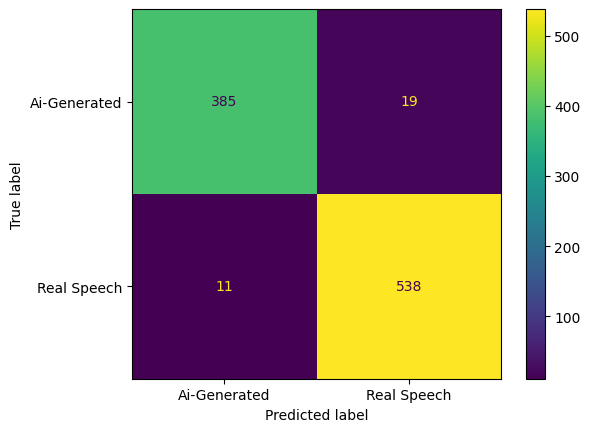

In [481]:
model, X_test, y_test, y_train, X_train = model()

In [482]:
import scikitplot 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay


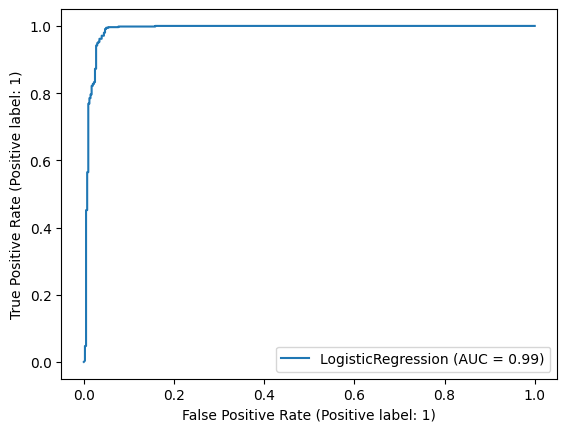

In [483]:
disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

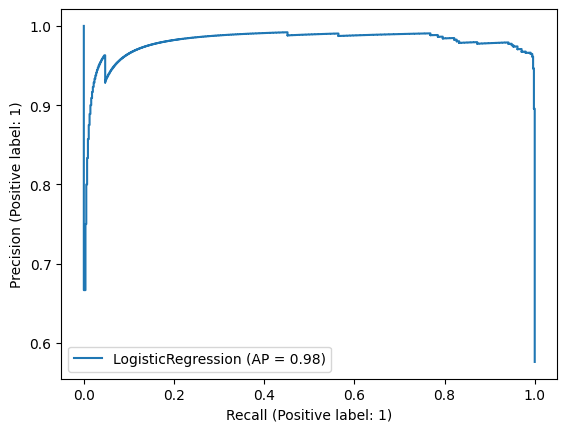

In [484]:
disp2 = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [485]:
import pickle

In [486]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [487]:
path = 'file_tests/chunks/'


In [488]:
def read_ceps_tes():
    X= []
    y=[]
    for x in [0,1]:
        print(x)
        if x:
            directory = "real_ceps/"
        else:
            #print("here")
            directory = "aigen_ceps/"

        for filename in os.listdir(directory):
            print(filename)
            if filename.endswith("npy"):
                ceps = np.load(directory + filename)
                num_ceps = len(ceps)
                X.append(np.mean(ceps[int(num_ceps*1/10):int(num_ceps*9/10)], axis=0))
                    #X.append(ceps)
                #print(y)
                y.append(x)

    print(np.array(X).shape)
    print(len(y))
    return np.array(X), np.array(y)

In [ ]:
_